In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('webmd.csv')

* Drug (categorical): name of drug
* DrugId (numerical): drug id
* Condition (categorical): name of condition
* Review (text): patient review
* Side (text): side effects associated with drug (if any)
* EaseOfUse (numerical): 5 star rating
* Effectiveness (numerical): 5 star rating
* Satisfaction (numerical): 5 star rating
* Date (date): date of review entry
* UsefulCount (numerical): number of users who found review useful.
* Age (numerical): age group range of user
* Sex (categorical): gender of user

In [3]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


# Preprocessing

## Handling missing values

In [5]:
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [6]:
data.dropna(inplace=True)

I also strip leading and trailing white spaces from string type data. These white spaces often conceal the fact that there is nothing useful in the data cell simply because white spaces are data as well.

In [7]:
for col in data.columns:
    if data[col].dtype.kind == "O":
        data[col] = data[col].str.strip()

In [8]:
for col in ["Age", "Condition", "Sex", "Reviews","Sides"]:
    data = data[(data[col].astype(bool)&data[col].notnull())]

In [9]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0


In [10]:
data.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [11]:
data['Drug'].nunique()

5014

In [12]:
data['DrugId'].nunique()

4522

In [13]:
data['Condition'].nunique()

1584

In [14]:
data['UsefulCount'].nunique()

144

In [15]:
data['Sides'].value_counts()

Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                                                                                11358
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                                                             10647
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                                                                       7025
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.                                                                    6326
Nausea ,  vomiting , loss of appetite,  heartburn ,  trouble sleeping , increased  sweating , or  acne  may occur.                                          

In [16]:
data['Reviews'].nunique()

216181

In [17]:
data['Sex'].value_counts()

Female    202977
Male       77136
Name: Sex, dtype: int64

In [18]:
data['Age'].value_counts()

45-54         64124
55-64         57465
35-44         45467
25-34         42795
65-74         29979
19-24         21233
75 or over    10726
13-18          5974
7-12           1334
3-6             623
0-2             393
Name: Age, dtype: int64

In [19]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,280113.000000,280113.000000,280113.000000,280113.000000,280113.000000
mean,35902.530564,4.031834,3.528497,3.085594,7.370308
std,51648.982286,1.316634,1.468042,1.622486,9.449920
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,2.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63163.000000,5.000000,5.000000,5.000000,10.000000
max,178485.000000,6.000000,6.000000,6.000000,255.000000


In [20]:
import itertools
drugs = {}
for drugid, drug in data[["DrugId", "Drug"]].itertuples(index=False):
    drugs.setdefault(drugid, set()).add(drug)
drugs = {k:list(v) for k,v in drugs.items()}

drugs_with_more_names = {k:list(v) for k,v in drugs.items() if len(v) > 1}
for k,v in dict(itertools.islice(drugs_with_more_names.items(), 10)).items():
    print(f"{k:10}: {list(v)[:2]}")

    167493: ['lynparza tablet', 'lynparza']
      7286: ['loteprednol etabonate ointment', 'loteprednol etabonate drops, suspension']
      7319: ['lotemax drops, gel', 'lotemax ointment']
    164437: ['lorcaserin tablet, extended release 24 hr', 'lorcaserin tablet']
      8892: ['lorazepam concentrate', 'lorazepam']
     76548: ['loratadine d', 'loratadine-d']
        73: ['loratadine tablet,disintegrating', 'loratadine']
      8555: ['loprox cream', 'loprox suspension, topical']
      4789: ['loperamide liquid', 'loperamide']
      5887: ['lithium carbonate', 'lithium carbonate er']


It turns out the reason why Drug has more values than DrugId is that some drugs are sold is different forms, like cream, pill, gel, etc. I am going to be using DrugId 

# Exploratory data analysis

## Analysis of target

In [21]:
print(data["Satisfaction"].value_counts())
data = data[data["Satisfaction"] <= 5]

5    84286
1    81799
4    47037
3    38948
2    28041
6        2
Name: Satisfaction, dtype: int64


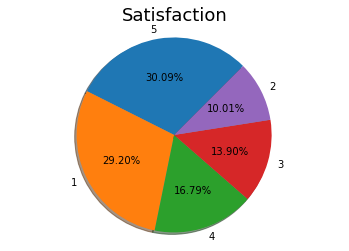

In [22]:
fig, ax = plt.subplots()
ax.pie(data['Satisfaction'].value_counts().values, labels = data['Satisfaction'].value_counts().index, autopct = '%1.2f%%', shadow = True, startangle = 45)
ax.axis('equal')
plt.title('Satisfaction', loc = 'center', fontsize = 18)
plt.show()

* Observation:-
    
    * From the figure it is clear that 30% of people is satisfied(5) with drug that means drugs have effect for the disease and no side effect.
    * 29.20% people were given 1 as satisfaction ie.,drugs they used have side effect and they are not satisfied with it.

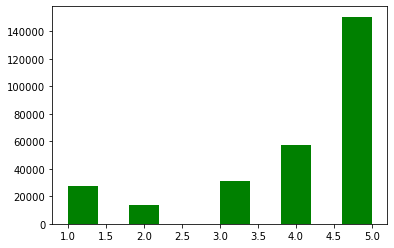

In [23]:
plt.hist(data=data,x='EaseofUse',color='green')
plt.show()

* Observation

From the graph we can find that most of the drugs were easy to use that is indicated as 5.Second highest is 4.

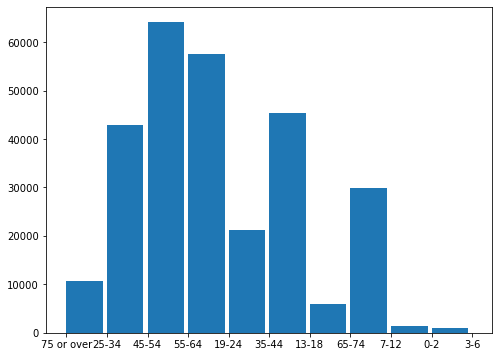

In [24]:
plt.figure(figsize=(8,6))
plt.hist(data=data,x='Age',width=0.9)
plt.show()

* Observation:-
    
    * People in the age group of 45-54 is high for using the drugs
    * Second highest number are from the 55-64 age group
    * Lowest were from the age group 0-2 and 3-6.
    * The data have general trend because aged people depends more on drugs than others.

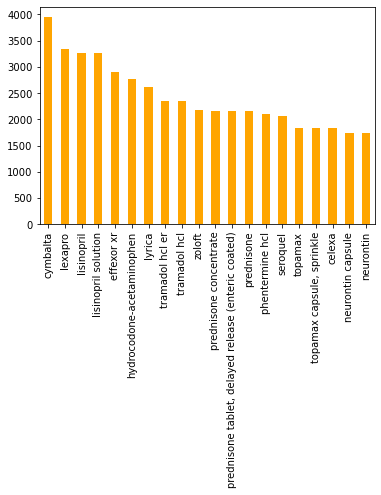

<Figure size 1080x1080 with 0 Axes>

In [25]:
data["Drug"].value_counts().head(20).plot(kind='bar',color='orange')
plt.figure(figsize=(15,15))
plt.show()

* Observation:-
    * The figure which shows the most commonly used drugs by the people
    * Highest or commonly used drug is cymbalta,then lexapro,lisinopril....etc.
    * cymbalta is used for depression disorder and anxiety.

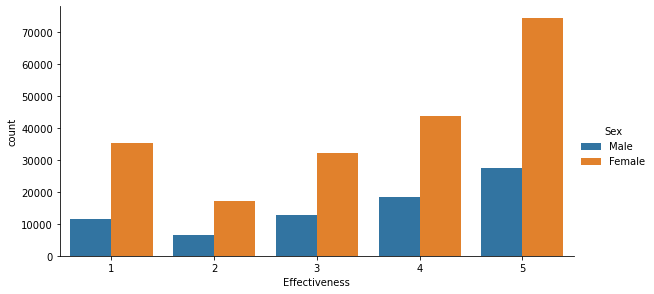

In [26]:
sns.catplot(x="Effectiveness", hue="Sex",
                data=data, kind="count",
                height=4, aspect=2);

* insight :- 
    
    From the figure we can conclude that effectiveness for both male and female is high(5).That means the drug is very effective.But more than 10000 males and 35000 females have not much effect on them while using the drugs.So there may be side effect. 

<AxesSubplot:xlabel='Age', ylabel='Effectiveness'>

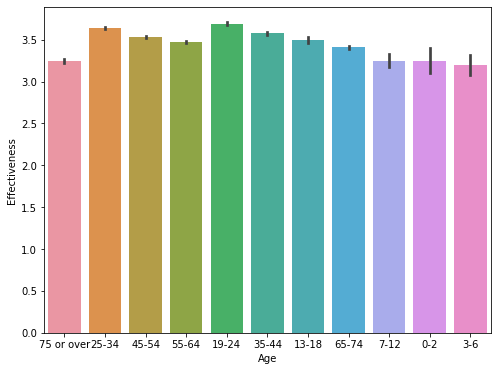

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(y='Effectiveness',x='Age',data=data)

* Insight :- 
    
    Age between 19-24 groups which have more effect of drugs on their body compared to other age groups.Effectiveness is low for the people having age above 75

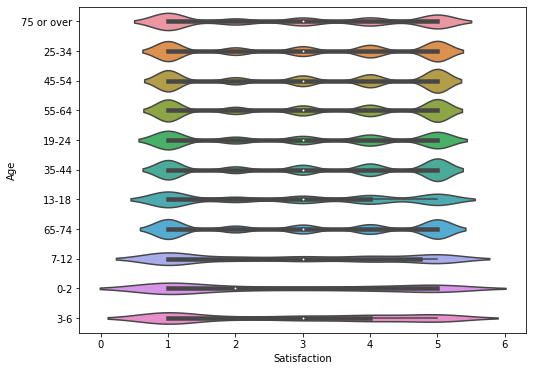

In [28]:
plt.figure(figsize=(8,6))
sns.violinplot(y='Age',x='Satisfaction',data=data)
plt.show()

* Insight :-
    
    * It is clear that most of the drugs are very easy to use.
    * Satisfaction among all age group are in similar trend.there is no abnormality shown.
    * In all age group fully satisfied and merely satisfied people have more number.

<AxesSubplot:title={'center':'Effectiveness vs Satisfaction'}, xlabel='Satisfaction', ylabel='Effectiveness'>

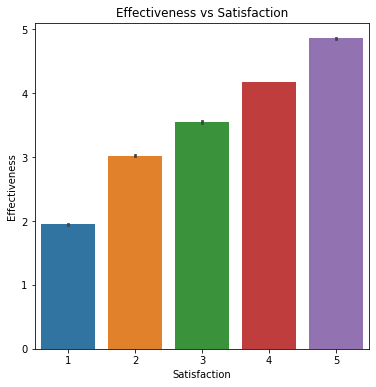

In [29]:
plt.figure(figsize=(6,6))
plt.title("Effectiveness vs Satisfaction")
sns.barplot(y='Effectiveness', x='Satisfaction', data=data,)

* Insight :-
    
    effectiveness and satisfaction are directly proportional.If the effect of drug is high the people's satisfaction also high.There may be less side effect for the drugs.

## Handling outliers

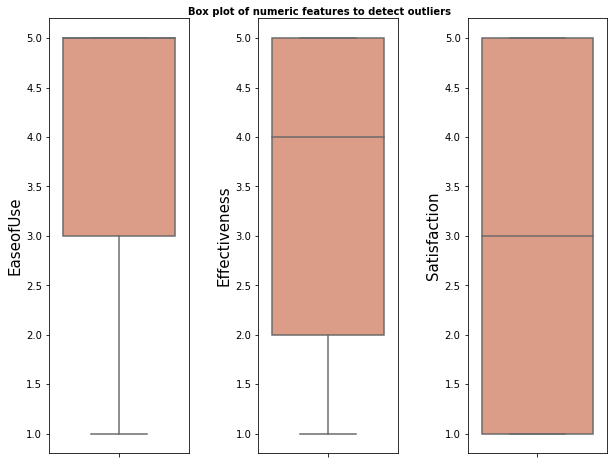

In [30]:
col_num=data.select_dtypes(include=["int64","float64"]).columns.tolist()
fig,axs=plt.subplots(1,3,figsize=(10,8))
fig.suptitle("Box plot of numeric features to detect outliers",y=.9,fontweight="bold",fontsize=10)
for col,ax in zip(col_num[1:],axs.flatten()):
    b=sns.boxplot(y=data[col],ax=ax,color="darksalmon")
    b.set_ylabel(col,fontsize=15)
    plt.subplots_adjust(wspace=.5)

#### Here the numeric features have no outliers.So that there is no need of handling..

# Feature reduction

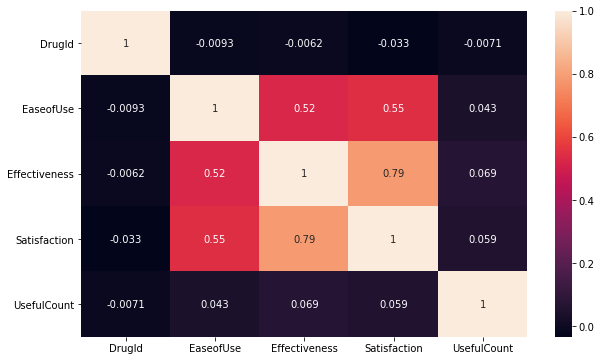

In [31]:
plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

From the figure we can conclude thatuseful count is less related to other features.Date and review will not give any information to modeling. Drug id and drug is less important so i dropped drug 

In [32]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [33]:
data.drop(['Drug','Reviews','UsefulCount','Date'],axis=1,inplace=True)

## Feature engineering

In [34]:
def relabel(x):
    return 0 if x < 3 else 1 if x == 3 else 2

data["Satisfaction"] = data["Satisfaction"].apply(relabel)

To make life easier I simplify the categories and group them as follows:

* Satisfaction 1 and 2 → 0 (No side effects)
* Satisfaction 3           → 1 (Neutral)
* Satisfaction 4 and 5 → 2 (have side effects)

In [35]:
data['Satisfaction'].value_counts()

2    131323
0    109840
1     38948
Name: Satisfaction, dtype: int64

# Label encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data.Age = lb.fit_transform(data.Age)
data.Sex = lb.fit_transform(data.Sex)
data.Condition = lb.fit_transform(data.Condition)
data.Sides = lb.fit_transform(data.Sides)

In [37]:
data

,Age,Condition,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides
0,10,1405,146724,5,5,2,1,397
1,3,376,146724,5,5,2,0,397
6,3,214,163180,5,5,0,0,1015
7,6,493,163180,5,5,2,0,1015
9,7,1405,9800,4,2,0,1,1456
...,...,...,...,...,...,...,...,...
362799,3,1396,144470,2,4,2,0,884
362801,7,1396,144470,5,5,2,0,884
362803,3,1396,144470,2,4,0,0,884
362804,7,1396,144470,5,5,2,1,884


# Splitting of dataset

In [38]:
x=data.drop(['Satisfaction'],axis=1)
y=data['Satisfaction']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# Modelling

In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
# to obtain optimum K value
# so we want to create model with varied k value
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNN(n_neighbors=k,metric='minkowski') 
    classifier.fit(x_train,y_train) 
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred) 
    acc_values.append(acc) 

Text(0, 0.5, 'accuracy')

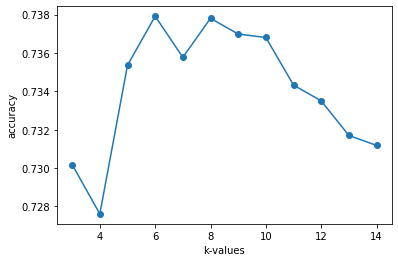

In [41]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-values')
plt.ylabel('accuracy')

# modeling with logistic regression,KNN,decision tree clasifier

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
SEED=42
lr=LogisticRegression(random_state=SEED)
knn=KNN(n_neighbors=6)
dtc=DecisionTreeClassifier(random_state=SEED)
classifiers=[('LogisticRegression',lr),('K Nearest Neighbors',knn),('Decision Tree',dtc)]

In [43]:
from sklearn.metrics import accuracy_score
for class_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('{:s}:{:.3f}'.format(class_name,accuracy))

LogisticRegression:0.504
K Nearest Neighbors:0.738
Decision Tree:0.775


In [44]:
conda install -c anaconda py-xgboost

Note: you may need to restart the kernel to use updated packages.




CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/anaconda/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/anaconda/win-64'




# Modeling with voting classifier,Random forest,Gradient boosting and Extreme gradient boosting classifier

In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
SEED = 42
vc=VotingClassifier(estimators=classifiers)
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
classifiers=[('Voting Classifier',vc),('Random Forest',rf),('Gradient Boosting',gb),('Extreme Gradient Boosting',xgb)]

In [46]:
for class_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('{:s}:{:.3f}'.format(class_name,accuracy))

Voting Classifier:0.759
Random Forest:0.802
Gradient Boosting:0.790
[23:39:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Extreme Gradient Boosting:0.797


# Model prediction Accuracy table

|Model|Accuracy score|
|:--|:-:|
|logistic regression|0.504|  
|KNN|0.738|
|Decision tree|0.775|
|Voting classifier|0.759|
|Random forest|0.802|
|Gradient boosting|0.790|
|Extreme gradient boosting|0.797|

### The best fitted model is the Random forest model and gives 80.2% accuracy.

# feature importance of Random forest model

In [47]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

Effectiveness    46.688231
EaseofUse        13.292293
DrugId           12.051895
Condition        10.241052
Sides             9.555833
Age               7.216122
Sex               0.954575
dtype: float64

In [48]:
rf.predict([[10,1405,146724,5,5,1,397]])

array([2], dtype=int64)

## Result:-
* Drugs which are commonly used are for depression and anxiety disorder
* From the data side effects are there for more number of drugs and then are neutral and no side effect drugs are less in         number
* So people should be aware of the side effects of drugs which is used for their disorder.